In [1]:
# Imports
import matplotlib as mpl
import seaborn as sns
# SSL to load seaborn example data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Locale settings
import locale
# Set to German locale to get comma decimal separater
# Check with "locale -a" if "de_DE.utf8" is installed on your system
# Installation guide: https://ubuntuforums.org/showthread.php?t=196414
locale.setlocale(locale.LC_NUMERIC, "de_DE.utf8")

from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import rcParams
from matplotlib.colors import rgb2hex

# Tell matplotlib to use the locale
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
# load seaborn example flights data
flights = sns.load_dataset("flights")
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


In [3]:
# Plot parameters
# Style
style = "whitegrid"
# Figure sizes
standard_sizes = {
    "a4portrait": (8.27, 11.69),
    "a4landscape": (11.69, 8.27),
    "a5portrait": (5.8, 8.3),
    "a5landscape": (8.3, 5.8),
}
# Font parameters
font = "Latin Modern Roman"
font_scale = 1.5
# Figure aesthetics
grid_linestyle = "--"
yticks = True
xticks = True

In [4]:
# Colors
def RGB_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return '#%02x%02x%02x' % (red, green, blue)

def rgb_to_RGB(rgb_tuple):
    return tuple([int(round(255*val, 0)) for val in rgb_tuple])

palette_colors = {
    "True Blue":"#0466c8",
    "USAFA Blue":"#0353a4",
    "Dark Cornflower Blue":"#023e7d",
    "Oxford Blue":"#002855",
    "Oxford Blue 2":"#001845",
    "Oxford Blue 3":"#001233",
    "Independence":"#33415c",
    "Black Coral":"#5c677d",
    "Roman Silver":"#7d8597",
    "Manatee":"#979dac",
}

palette = sns.color_palette(list(palette_colors.values()))


rgb_grid = (200, 200, 200)
rgb_labels = (0, 0, 0)


hex_grid = RGB_to_hex(*rgb_grid)
hex_labels = RGB_to_hex(*rgb_labels)

print("="*10, "COLOR PALETTE", "="*10)

for color in palette:
    print(f"HEX: {rgb2hex(color)} --> RGB: {rgb_to_RGB(color)}")
    
print("\n", "="*10, "GRID", "="*10)
print(f"HEX: {hex_grid} --> RGB: {rgb_grid}")

print("\n", "="*10, "LABELS", "="*10)
print(f"HEX: {hex_labels} --> RGB: {rgb_labels}")

========== COLOR PALETTE ==========
HEX: #0466c8 --> RGB: (4, 102, 200)
HEX: #0353a4 --> RGB: (3, 83, 164)
HEX: #023e7d --> RGB: (2, 62, 125)
HEX: #002855 --> RGB: (0, 40, 85)
HEX: #001845 --> RGB: (0, 24, 69)
HEX: #001233 --> RGB: (0, 18, 51)
HEX: #33415c --> RGB: (51, 65, 92)
HEX: #5c677d --> RGB: (92, 103, 125)
HEX: #7d8597 --> RGB: (125, 133, 151)
HEX: #979dac --> RGB: (151, 157, 172)

 ========== GRID ==========
HEX: #c8c8c8 --> RGB: (200, 200, 200)

 ========== LABELS ==========
HEX: #000000 --> RGB: (0, 0, 0)


In [5]:
palette

[(0.01568627450980392, 0.4, 0.7843137254901961),
 (0.011764705882352941, 0.3254901960784314, 0.6431372549019608),
 (0.00784313725490196, 0.24313725490196078, 0.49019607843137253),
 (0.0, 0.1568627450980392, 0.3333333333333333),
 (0.0, 0.09411764705882353, 0.27058823529411763),
 (0.0, 0.07058823529411765, 0.2),
 (0.2, 0.2549019607843137, 0.3607843137254902),
 (0.3607843137254902, 0.403921568627451, 0.49019607843137253),
 (0.49019607843137253, 0.5215686274509804, 0.592156862745098),
 (0.592156862745098, 0.615686274509804, 0.6745098039215687)]

In [6]:
# Set seaborn parameters
rc_theme = {
    "grid.linestyle":grid_linestyle,
    "ytick.left":yticks,
    "xtick.bottom":xticks,
    "ytick.color":hex_grid,
    "xtick.color":hex_grid,
    "grid.color":hex_grid,
}

sns.set_theme(
    style=style, font=font, font_scale=font_scale, palette=palette, rc=rc_theme)

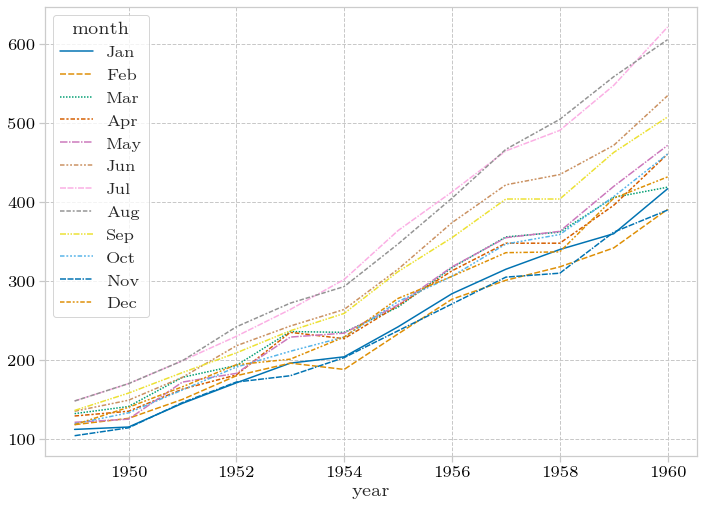

In [7]:
# Set subplot parameters
fig, ax = plt.subplots(figsize=standard_sizes["a4landscape"])

sns.lineplot(data=flights_wide, ax=ax, palette=sns.color_palette("colorblind", n_colors=12))

for label in ax.get_xticklabels():
    label.set_color(hex_labels)

for label in ax.get_yticklabels():
    label.set_color(hex_labels)

plt.show()

In [8]:
rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': True,
          'axes.formatter.use_mathtext': False,
          'axe